### Import libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

### Retrieve Data

In [20]:
data = pd.read_csv("pet_supplies.csv")

data

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


### Find Missing Data

In [34]:
print(f"category missing: {len(data[data['category']=='-'])}")
print(f"category missing: {len(data[data['price']=='unlisted'])}")
print(f"rating missing: {len(data[data['rating'].isna()])}")

category missing: 25
category missing: 150
rating missing: 150


### Clear Data

In [35]:
clean_data = data

print(type(clean_data['price']))

clean_data['category'] = clean_data['category'].replace(['-'],'unknown')
clean_data['price'] = clean_data['price'].replace(
    ['unlisted'],
    pd.to_numeric(clean_data['price'], errors='coerce').median()
)
clean_data['rating'] = clean_data['rating'].fillna(0)

clean_data

<class 'pandas.core.series.Series'>


,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


### Visualize Category vs Sales

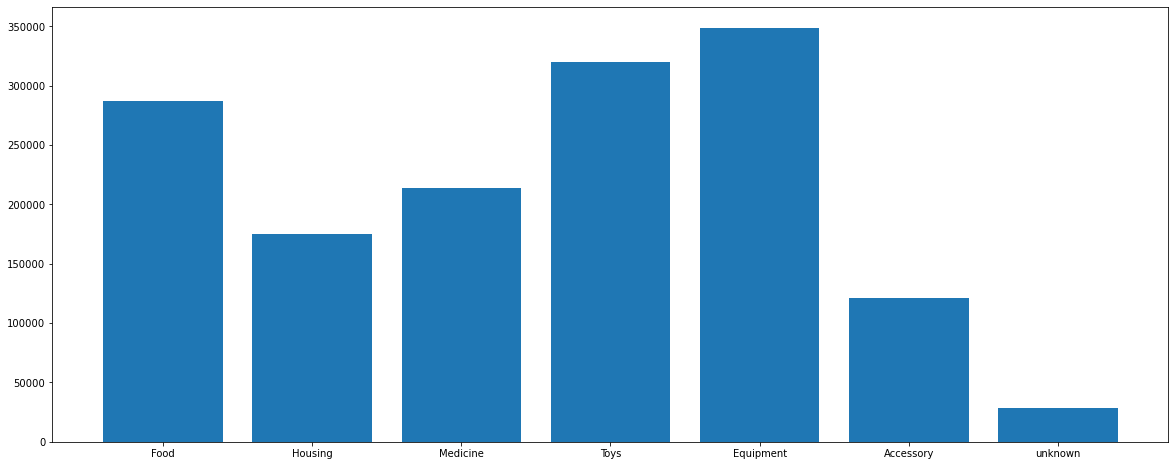

In [50]:
fig = plt.figure(1, [20, 8])

categories = clean_data['category'].drop_duplicates()
salesPerCategory = [
    clean_data[clean_data['category'] == categorie]['sales'].sum()
    for categorie in categories
]

plt.bar(x=categories,height=salesPerCategory)
plt.show()


### Repeat Purchases vs Visualize Sales

Median Comparison: NRP = 1030.185 , RP = 978.21
Mean Comparison: NRP = 1028.3680134680128 , RP = 975.7683995584985


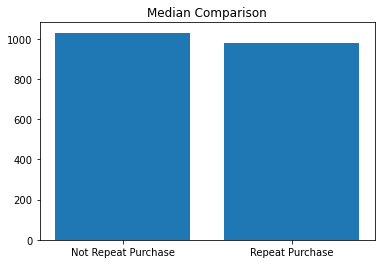

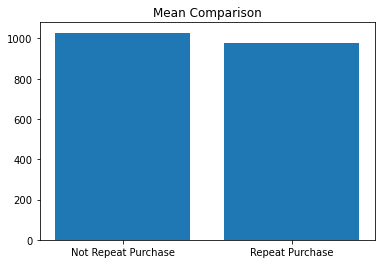

In [60]:
clean_data_rp = clean_data[clean_data['repeat_purchase'] == 1]
median_rp = clean_data_rp['sales'].median()
mean_rp = clean_data_rp['sales'].mean()

clean_data_nrp = clean_data[clean_data['repeat_purchase'] == 0]
median_nrp = clean_data_nrp['sales'].median()
mean_nrp = clean_data_nrp['sales'].mean()

print(f"Median Comparison: NRP = {median_nrp} , RP = {median_rp}")
print(f"Mean Comparison: NRP = {mean_nrp} , RP = {mean_rp}")

plt.bar(x=['Not Repeat Purchase','Repeat Purchase'],height=[median_nrp,median_rp])
plt.title("Median Comparison")
plt.show()

plt.bar(x=['Not Repeat Purchase','Repeat Purchase'],height=[mean_nrp,mean_rp])
plt.title("Mean Comparison")
plt.show()